### Feature Engineering
- Data Cleaning
- Data Visualization
### One Hot Encoding


In [40]:
# Importing the common Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("/content/titanic.csv")

In [3]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Different types of Missing Data

-  1. Missing Completely at Random( MCAR)
-  2. Missing Data Not At Random(MNAR)
-  3. Missing At Random(MAR)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusion**
- Age have 177 Missing Values
- Cabin have 687 Missing Values
- Embarked have Just 2 Missing Values
- Other Column have 0 Missing Values

**Age and Cabin are related to each other so it is an example of Missing Data Not At Random(MNAR)**

**Embarked is not related to any other feature so it is an example of Missing Data At Random(MAR)**

In [5]:
# Nan Value Replace with 1 and Not nan Values replace with 0
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

** Conclusion**
- Feature Cabin has 77% of Null Values

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [7]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

**Conclusion**
- According to Above
- 60% of Cabin Passanger Survived
- 87% of Cabin Not Survived

### Mean-Median-Mode Replacement

**We solve this by replacing the NAN value with the most frequent occurance of the variables**

In [8]:
df = pd.read_csv('/content/titanic.csv', usecols=['Age','Fare','Survived'])

- Now I want to Check the % of missing Values lets go

In [9]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

**Conclusion**
- Age has 19% of Missing Values

**I want to fill Age Nan Values with medain of the Data**

In [10]:
median = df.Age.median()
median
# The Median of the Age Feature is 28

28.0

In [11]:
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [12]:
print(df['Age'].std())
# After replacing the Nan Values
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


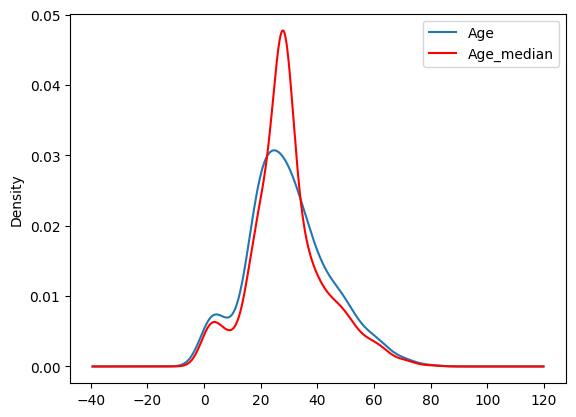

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind= 'kde', ax = ax)
df.Age_median.plot(kind = 'kde', ax = ax, color = 'red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc= 'best')

### Random Sample Imputation

In [15]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [16]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
dtype: int64

In [17]:
df['Age'].isnull().sum()

177

In [19]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

** Values randomly replace by another Values
i.e
- 177 is replace by 50.00
- 305 is replace 0.92

In [20]:
df[df['Age'].isnull()].index
# Getting index of the nan Value

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [26]:
median=df.Age.median()
def impute_nan(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
    df[feature+"_random"]=df[feature]
    ##It will have the random sample to fill the na
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+'_random']=random_sample

impute_nan(df,"Age",median)
df.head(20)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


- Here NaN Values replace with random values

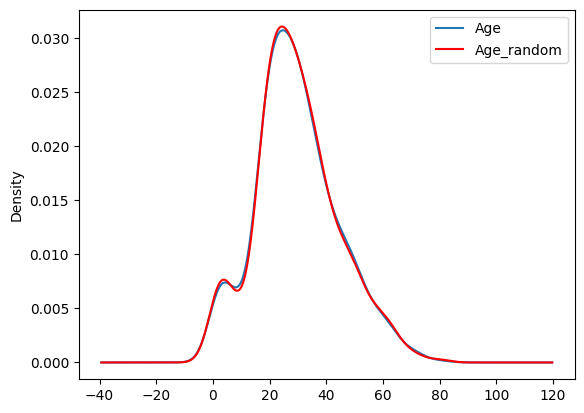

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- Here distorion is less compare to median Graph Above

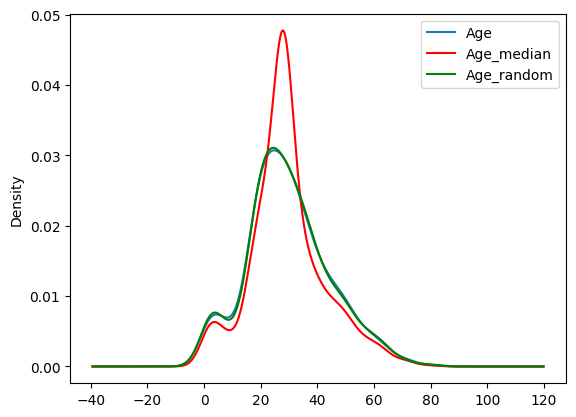

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Capturing the Nan Values with the New Featiure


In [30]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [31]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0


In [32]:
df.Age.median()

28.0

In [33]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [34]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random,Age_NAN
0,0,22.0,7.2500,22.0,22.00,0
1,1,38.0,71.2833,38.0,38.00,0
2,1,26.0,7.9250,26.0,26.00,0
3,1,35.0,53.1000,35.0,35.00,0
4,0,35.0,8.0500,35.0,35.00,0
5,0,28.0,8.4583,28.0,28.00,1
6,0,54.0,51.8625,54.0,54.00,0
7,0,2.0,21.0750,2.0,2.00,0
8,1,27.0,11.1333,27.0,27.00,0
9,1,14.0,30.0708,14.0,14.00,0


- NaN value replace by '1' and not NaN by '0'

###End of Distribution imputation
- In this method we replace missing values with far end values or extreme
- Far end value means the values after 3rd standard deviation

In [37]:
df1 = pd.read_csv('/content/titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df1.head(10)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


<Axes: >

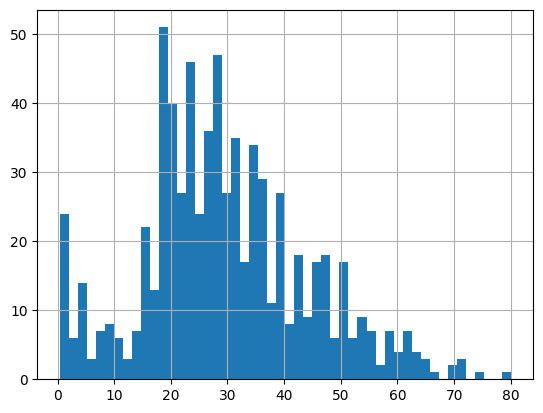

In [38]:
df1.Age.hist(bins=50)

In [39]:
extreme = df1.Age.mean()+3*df1.Age.std()

<Axes: xlabel='Age'>

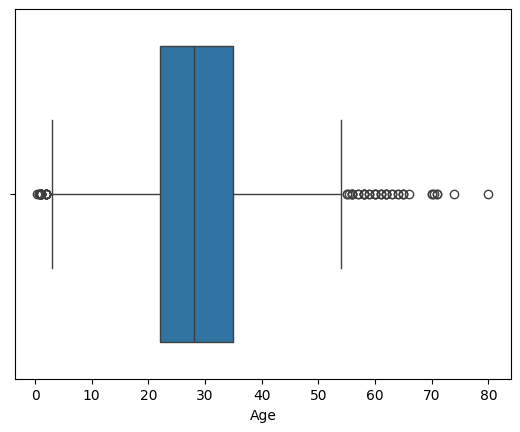

In [42]:
sns.boxplot(x = 'Age', data = df)

In [43]:
def impute_nan(df1,variable,median,extreme):
    df1[variable+"_end_distribution"]=df1[variable].fillna(extreme)
    df1[variable].fillna(median,inplace=True)

impute_nan(df1,'Age',df1.Age.median(),extreme)
df1.head(20)


,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

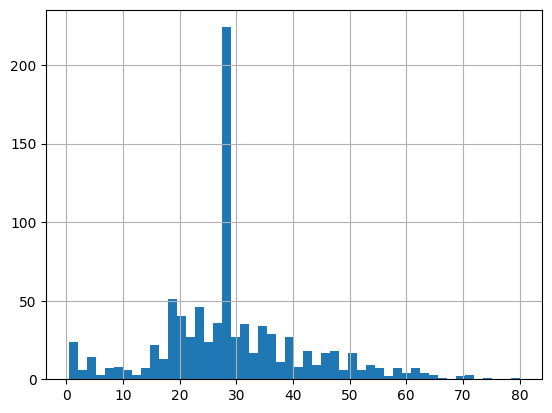

In [44]:
df1['Age'].hist(bins= 50)

<Axes: >

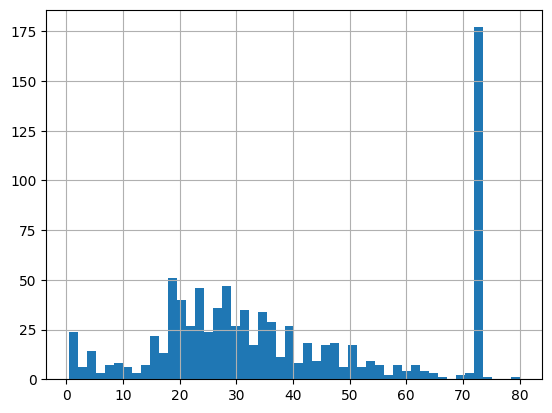

In [46]:
df1['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

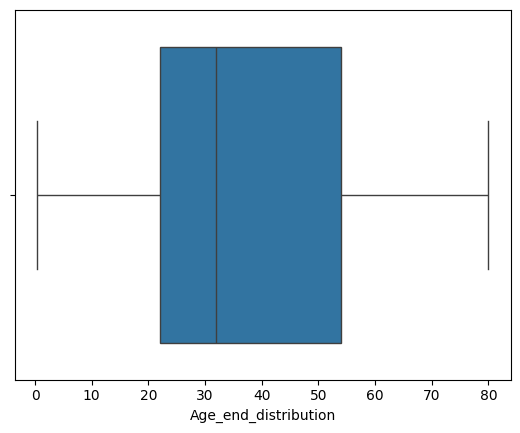

In [47]:
sns.boxplot(x ='Age_end_distribution', data = df1)

### Arbitrary Value Imputation

- This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [48]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

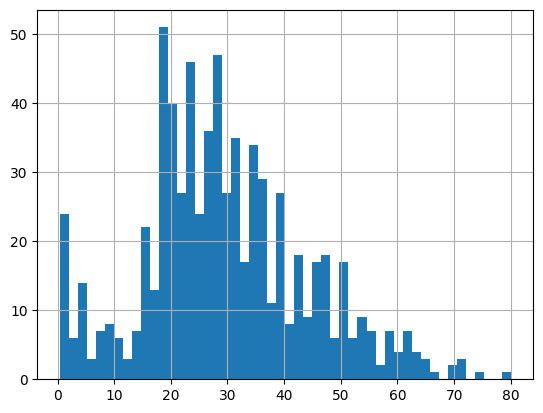

In [49]:
# Arbitrary values
df ['Age'].hist(bins=50)

In [51]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)
impute_nan(df,'Age')
df.head(20)

,Survived,Age,Fare,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


- The Arbitrary values as 100

### Frequent categories imputation

In [52]:
loan =pd.read_csv(r'/content/train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [53]:
loan.shape

(1460, 4)

In [54]:
loan.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [56]:
# Finding percentage
loan.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

**1.Compute the frequency with every feature**

<Axes: >

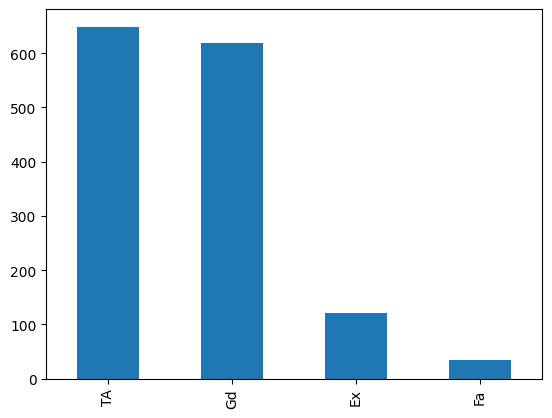

In [57]:
# NaN value replace by the most frequency
loan['BsmtQual'].value_counts().plot.bar()

<Axes: >

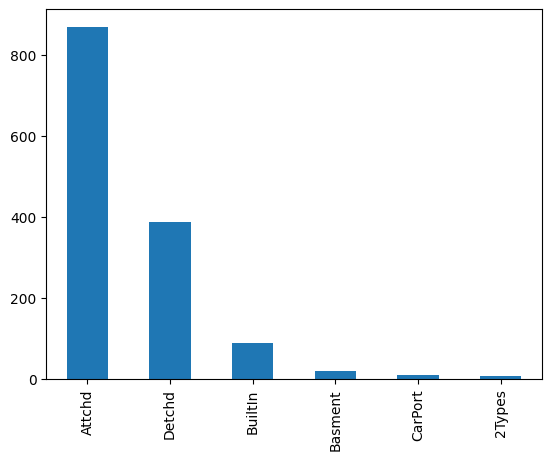

In [59]:
loan['GarageType'].value_counts().plot.bar()

<Axes: >

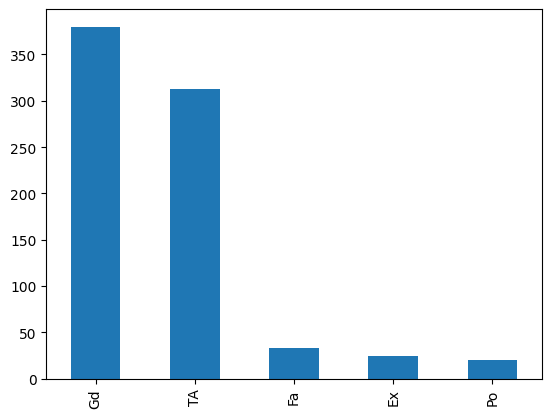

In [61]:
loan['FireplaceQu'].value_counts().plot.bar()

In [62]:
# highest category name in specific variable
loan['GarageType'].value_counts().index[0]

'Attchd'

- 'Attchd' is more frequently repeated in feature 'GarageType'

In [63]:
# Replacing Function
def impute_nan(df,variable):
    most_frequent_category=loan[variable].mode()[0]
    loan[variable].fillna(most_frequent_category,inplace=True)

In [64]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(loan,feature)

In [65]:
loan.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

**2. Adding a variable to capture NAN**

In [66]:

loan =pd.read_csv(r'train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [67]:
loan['BsmtQual_Var'] = np.where(loan['BsmtQual'].isnull(),1,0)

In [68]:
loan['BsmtQual'].value_counts().index[0]

'TA'

In [69]:
frequent = loan['BsmtQual'].value_counts().index[0]
loan['BsmtQual'].fillna(frequent, inplace=True)
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [70]:
loan['FireplaceQu_Var']=np.where(loan['FireplaceQu'].isnull(),1,0)
# Alternative way to find the High Frequency
frequent=loan['FireplaceQu'].mode()[0]
loan['FireplaceQu'].fillna(frequent,inplace=True)

In [71]:
loan.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


- Suppose if you have more frequent categories, we just replace NAN with a new category

In [72]:
loan =pd.read_csv(r'train.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [73]:
def impute_nan(df,variable):
    loan[variable+"newvar"]=np.where(loan[variable].isnull(),"Missing",loan[variable])

for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(loan,feature)

In [74]:
loan.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


**Droping Unnecessary Features

In [75]:
loan = loan.drop(['BsmtQual','FireplaceQu','GarageType'],axis = 1)

In [76]:
loan.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### Encoding Categorical Variables





- Categorical variables need to be converted into numerical representations for machine learning algorithms to process them. One-hot encoding, label encoding, and target encoding are common techniques for this purpose.

**1. One Hot Encoding**

In [77]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [78]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [79]:
pd.get_dummies(df, drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [80]:
df=pd.read_csv('titanic.csv',usecols=['Embarked'])


In [83]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [84]:
df.dropna(inplace= True)

In [85]:
pd.get_dummies(df,drop_first=True).head()
# Two features will represent thirf features

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
